In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#importing manager csv
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()
#removing additional years
female_labor_2019=female_labor[["new_code", "year_2019"]]
female_labor_2019.head()
#renaming 2019

female_labor_2019_final=female_labor_2019.rename(columns = {
    "year_2019" :"labor"
})
female_labor_2019_final.head()

,new_code,labor
0,AW,0.000000
1,AF,21.594999
2,AO,76.136002
3,AL,46.712002
4,AD,0.000000


In [15]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()
#reducing columns
female_parliament_2019=female_parliament[["new_code", "year_2019"]]
female_parliament_2019.head()
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "year_2019" :"parliament"
})
female_parliament_2019_final.head()

,new_code,parliament
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [16]:
labor_regression=pd.merge(female_parliament_2019_final, female_labor_2019_final, how='inner', on=["new_code", "new_code"])

In [17]:

labor_regression_final=labor_regression[(labor_regression["labor"]>0)]
labor_regression_final

,new_code,parliament,labor
0,AL,29.508197,46.712002
1,DZ,25.757576,14.591000
3,AO,30.000000,76.136002
5,AM,23.484848,47.074001
6,AU,30.463576,60.299999
...,...,...,...
129,UZ,16.000000,52.377998
130,VU,0.000000,60.956001
131,VN,26.720648,72.708000
132,ZM,17.964072,70.370003


In [18]:
X = labor_regression_final[['parliament']]
y = labor_regression_final["labor"].values.reshape(-1, 1)
print(X.shape, y.shape)

(121, 1) (121, 1)


In [19]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [20]:
# from sklearn.preprocessing import StandardScaler
# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [21]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

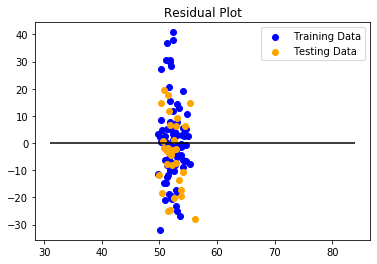

In [29]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.savefig("static/images/machine_learning.svg")

In [35]:
# # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             target_names=target_names))
print (X_test, predictions)




     parliament
48    31.884058
51    38.095238
6     30.463576
59    10.107527
28    53.223140
70    21.276596
81    17.333333
12     9.375000
43    30.888575
120   17.449664
20    20.000000
67    23.333333
13     7.228916
39    38.756856
100   10.000000
131   26.720648
123   34.858388
0     29.508197
99    61.250000
116   16.483516
71    25.000000
49     2.542373
34    26.842105
77    20.000000
46    19.375000
14    14.893617
17    15.009747
128   19.191919
85    40.833333
110    5.333333
26    45.614035 [[53.08861588]
 [53.74218929]
 [52.93914523]
 [50.79717343]
 [55.33402766]
 [51.97244228]
 [51.55751123]
 [50.72009306]
 [52.98386591]
 [51.5697522 ]
 [51.83811208]
 [52.18886314]
 [50.49427065]
 [53.8118082 ]
 [50.78585888]
 [52.54529439]
 [53.40159068]
 [52.83861512]
 [56.17865651]
 [51.46808898]
 [52.36423868]
 [50.00112769]
 [52.55807479]
 [51.83811208]
 [51.77234626]
 [51.3007913 ]
 [51.31301107]
 [51.75308152]
 [54.03030624]
 [50.29480739]
 [54.53335711]]


In [13]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 179.434515359419, R2: -0.03836423109620335


In [16]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1997718089543792, R2: -0.02275593332179149


In [17]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1959798149742595, R2: -0.019523415010106904


In [18]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.198059587925309, R2: -0.02129633558531374
